In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv")

In [3]:
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


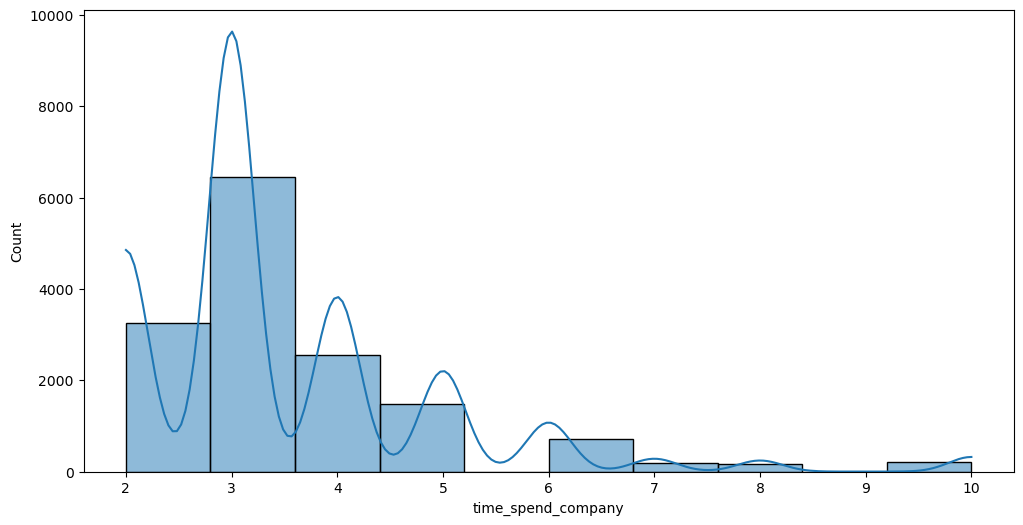

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="time_spend_company", bins=10, kde=True)
plt.show()

In [6]:
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

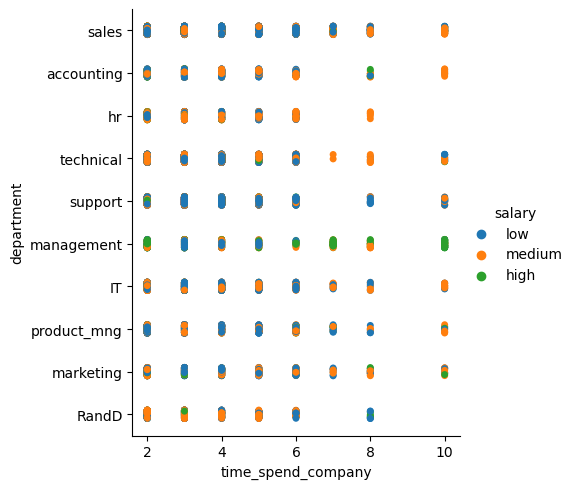

In [8]:
sns.catplot(data=df, x="time_spend_company", y="department", hue="salary")
plt.show()

#### From the above graph it can be analyzed that "HR" and R&D" department employees do not retent more than 8 years.

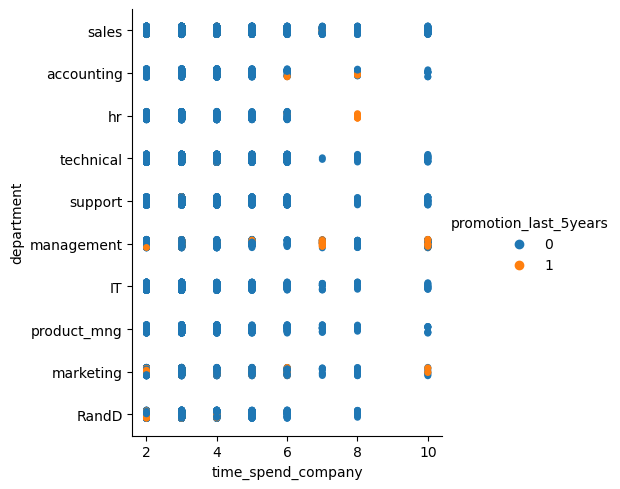

In [9]:
sns.catplot(data=df, x="time_spend_company", y="department", hue="promotion_last_5years")
plt.show()

#### From the above graph it can be analyzed that promotion criteria in the company is less and hence this might be the reason for people leaving the company

## Loading our second dataset that is employee satisfaction data

In [10]:
df_emp_sat = pd.read_excel('Data Practice/employee_satisfaction_evaluation.xlsx', index_col="EMPLOYEE #")

In [11]:
df_emp_sat.head()

,satisfaction_level,last_evaluation
EMPLOYEE #,,
1003,0.38,0.53
1005,0.80,0.86
1486,0.11,0.88
1038,0.72,0.87
1057,0.37,0.52


In [12]:
main_df = df.set_index("employee_id").join(df_emp_sat)
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [13]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
main_df.fillna(main_df.mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2348\1234004495.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  main_df.fillna(main_df.mean(), inplace=True)


In [15]:
main_df[main_df.isnull().any(axis=1)]
#removed all missing values and replaced by mean value

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [16]:
main_df = main_df.set_index("employee_id")

In [17]:
main_df.groupby('department').sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_2348\2528291099.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  main_df.groupby('department').sum()


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [18]:
main_df.groupby('department').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_2348\309158596.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  main_df.groupby('department').mean()


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


Employees left: 23.81
Employees retained: 76.19


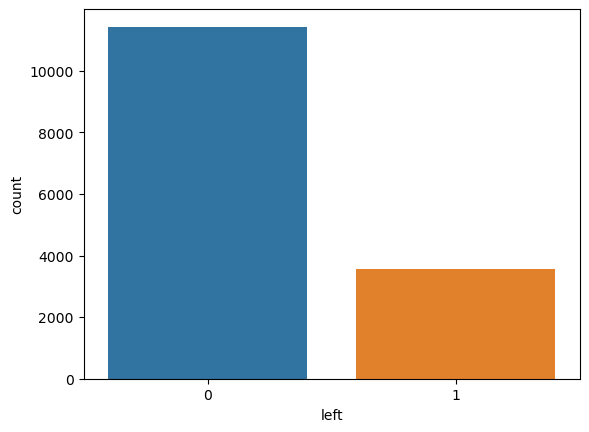

In [19]:
sns.countplot(data=main_df, x="left")
print(f"Employees left: {(round(main_df['left'].value_counts()[1] / len(main_df) * 100, 2))}")
print(f"Employees retained: {100-(round(main_df['left'].value_counts()[1] / len(main_df) * 100, 2))}")

#### From above illustration it can be predicted that 23.81% employee have left

C:\Users\HP\AppData\Local\Temp\ipykernel_2348\1679278971.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(main_df.corr(), annot=True)


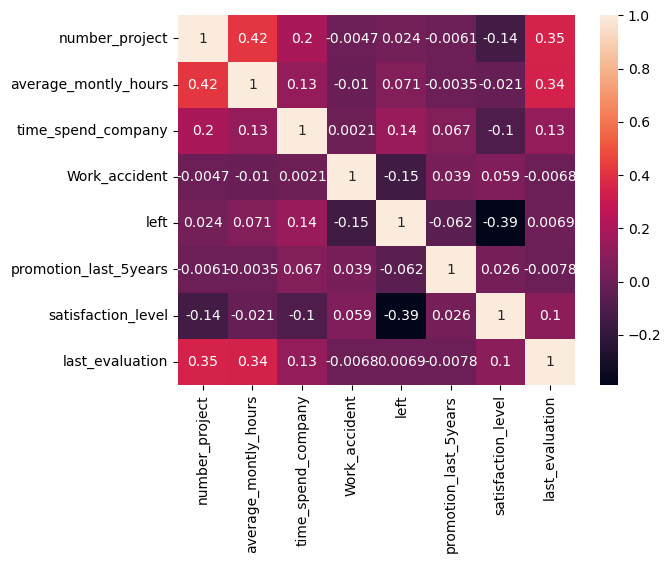

In [20]:
sns.heatmap(main_df.corr(), annot=True)
plt.show()

In [21]:
def max_correlations_sorted(data, percentage=0.3, sorting="ascending"):
    """
    This function is responsible for extract the correlated features based on the provided percentage.
    :param data: correlated data need to be provided having same shape
    :param percentage: Default 0.3, However, you can set any float value to get the max correlations
    :param sorting: Default "ascending". Set "descending" or none.
    :return:
    """

    high_corr_vars = []
    for i in range(len(data)):
        for j in range(i):
            if abs(data.iloc[i, j]) > percentage:
                high_corr_vars.append((data.index[i], data.columns[j], data.iloc[i, j]))

    # Convert the list to a Pandas dataframe
    df_high_corr_vars = pd.DataFrame(high_corr_vars, columns=['Variable 1', 'Variable 2', 'Correlation'])

    if sorting.lower() == "ascending":
        return df_high_corr_vars.sort_values(by='Correlation', ascending=True)
    elif sorting.lower() == "descending":
        return df_high_corr_vars.sort_values(by='Correlation', ascending=False)
    else:
        return df_high_corr_vars

In [22]:
max_correlations_sorted(main_df.corr(), percentage=0.1, sorting="descending")

C:\Users\HP\AppData\Local\Temp\ipykernel_2348\3150402266.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  max_correlations_sorted(main_df.corr(), percentage=0.1, sorting="descending")


,Variable 1,Variable 2,Correlation
0,average_montly_hours,number_project,0.417211
8,last_evaluation,number_project,0.348776
9,last_evaluation,average_montly_hours,0.339014
1,time_spend_company,number_project,0.196786
3,left,time_spend_company,0.144822
10,last_evaluation,time_spend_company,0.131078
2,time_spend_company,average_montly_hours,0.127755
11,last_evaluation,satisfaction_level,0.103783
6,satisfaction_level,time_spend_company,-0.101165
5,satisfaction_level,number_project,-0.143895


#### Above are the variable havning highest correlation between them

In [23]:
categorical = ["department", "salary"]
hr = pd.get_dummies(main_df, columns=categorical, drop_first=True)

In [24]:
#Q. How many employeed have left according to dataset?
len(hr.loc[hr["left"] == 1])

3571

## Preparing our datset for machine learning

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
X = hr.drop('left', axis=1)
y = hr['left']

In [27]:
X

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
employee_id,,,,,,,,,,,,,,,,,,
1003,2,157,3,0,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1005,5,262,6,0,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
1486,7,272,4,0,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
1038,5,223,5,0,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
1057,2,159,3,0,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87670,2,151,3,0,0,0.40,0.57,0,0,0,0,0,0,0,1,0,1,0
87673,2,160,3,0,0,0.37,0.48,0,0,0,0,0,0,0,1,0,1,0
87679,2,143,3,0,0,0.37,0.53,0,0,0,0,0,0,0,1,0,1,0


In [28]:
# Splitting ratio of 70:30 = train:test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.587060,0.983762,0.340625,-0.413022,-0.148657,-2.063240,0.721656,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,3.854804,-0.622620,-0.413970,-0.467036,1.029092,-0.872176
1,0.159755,-0.940732,-0.343557,2.421176,-0.148657,-0.175855,-0.213024,-0.233765,-0.232629,-0.222206,4.578694,-0.241151,-0.259417,-0.622620,-0.413970,-0.467036,-0.971730,1.146558
2,-1.458448,-0.940732,-0.343557,-0.413022,-0.148657,-0.898683,-1.381375,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.622620,-0.413970,2.141162,1.029092,-0.872176
3,0.159755,-1.381761,0.340625,-0.413022,-0.148657,1.189488,-0.213024,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.622620,-0.413970,-0.467036,-0.971730,1.146558
4,0.968857,1.244370,1.024807,-0.413022,-0.148657,0.828074,1.481084,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.622620,-0.413970,2.141162,-0.971730,1.146558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,0.159755,0.903575,-0.343557,-0.413022,-0.148657,-0.376640,1.422667,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.622620,2.415634,-0.467036,1.029092,-0.872176
10495,0.159755,0.642966,2.393172,-0.413022,-0.148657,-0.497112,-0.388277,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,1.606117,-0.413970,-0.467036,-0.971730,1.146558
10496,0.968857,0.963715,-1.027740,-0.413022,-0.148657,0.185560,0.079064,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.622620,2.415634,-0.467036,-0.971730,1.146558
10497,0.159755,0.342264,1.024807,-0.413022,-0.148657,0.707602,1.656337,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,1.606117,-0.413970,-0.467036,1.029092,-0.872176


**As the we need to predict whether employee will retain or not hence it is binary classification problem**

Following alogirthms will be used to train a retention classification model
1. Logistic Regression
2. Random Forest Classifier
3. Linear Support Vector CLassifier
4. Simple Artificial Neural Classifier Network
5. Deep ANN

In [31]:
model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
predictions = model.predict(X_test)

In [33]:
def printModelTrainingReport(y_pred, y_test):
    print(f"Accuracy {accuracy_score(y_pred, y_test)} \n")
    print(f"Confusion matrix \n\n {confusion_matrix(y_test, y_pred)} \n")
    print(f"classification Report: {classification_report(y_test, y_pred)}")
    
printModelTrainingReport(predictions, y_test)

Accuracy 0.7857777777777778 

Confusion matrix 

 [[3170  258]
 [ 706  366]] 

classification Report:               precision    recall  f1-score   support

           0       0.82      0.92      0.87      3428
           1       0.59      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500



In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = rfc.predict(X_test)

In [36]:
printModelTrainingReport(y_pred, y_test)

Accuracy 0.9851111111111112 

Confusion matrix 

 [[3418   10]
 [  57 1015]] 

classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.98      4500



In [37]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.0001)
svc.fit(X_train, y_train)

LinearSVC(C=0.0001)

In [38]:
y_pred2 = svc.predict(X_test)

In [39]:
printModelTrainingReport(y_pred2, y_test)

Accuracy 0.7697777777777778 

Confusion matrix 

 [[3203  225]
 [ 811  261]] 

classification Report:               precision    recall  f1-score   support

           0       0.80      0.93      0.86      3428
           1       0.54      0.24      0.34      1072

    accuracy                           0.77      4500
   macro avg       0.67      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



In [40]:
tf.random.set_seed(42)

model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(9, kernel_initializer="uniform", activation="relu", input_shape=(18,)),
    tf.keras.layers.Dense(1, kernel_initializer="uniform", activation="sigmoid")
])

model_ann.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [41]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [42]:
BATCH_SIZE = 32
EPOCHS = 10

history_1 = model_ann.fit(X_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      verbose=1,
                      validation_data=(X_test, y_test))

Epoch 1/10
329/329 [==============================] - 2s 3ms/step - loss: 0.5472 - accuracy: 0.7790 - val_loss: 0.4122 - val_accuracy: 0.8164
Epoch 2/10
329/329 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8578 - val_loss: 0.2992 - val_accuracy: 0.8833
Epoch 3/10
329/329 [==============================] - 1s 3ms/step - loss: 0.2603 - accuracy: 0.9091 - val_loss: 0.2431 - val_accuracy: 0.9158
Epoch 4/10
329/329 [==============================] - 1s 2ms/step - loss: 0.2164 - accuracy: 0.9340 - val_loss: 0.2117 - val_accuracy: 0.9360
Epoch 5/10
329/329 [==============================] - 1s 2ms/step - loss: 0.1918 - accuracy: 0.9425 - val_loss: 0.1942 - val_accuracy: 0.9440
Epoch 6/10
329/329 [==============================] - 1s 2ms/step - loss: 0.1782 - accuracy: 0.9460 - val_loss: 0.1855 - val_accuracy: 0.9478
Epoch 7/10
329/329 [==============================] - 1s 2ms/step - loss: 0.1702 - accuracy: 0.9493 - val_loss: 0.1813 - val_accuracy: 0.9491
Epoch 

In [43]:
def annScore(X_test, y_test, model):
    score = model.evaluate(X_test, y_test, verbose=1)
    print(f'Test Loss: {score[0]}')
    print(f'Test accuracy: {score[1]*100}')

In [44]:
annScore(X_test, y_test, model_ann)

141/141 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9489
Test Loss: 0.17562668025493622
Test accuracy: 94.8888897895813


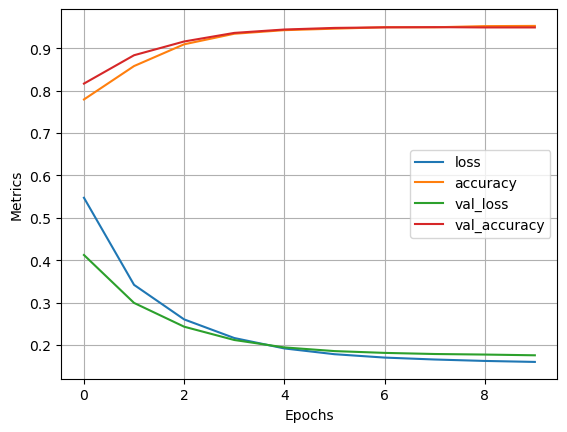

In [45]:
pd.DataFrame(history_1.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.grid(True)
plt.legend()
plt.show()

In [46]:
def plot_loss_accuracy_curve(history):
    history_dict = history.history
    loss_train = history_dict['loss']
    loss_val = history_dict['val_loss']
    acc_train = history_dict['accuracy']
    acc_val = history_dict["val_accuracy"]
    epochs = range(1, len(loss_train)+1)
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(epochs, loss_train, label="loss_train")
    ax[0].plot(epochs, loss_val, label="loss_val")
    ax[0].set_ylabel("Loss")
    ax[0].grid(True)
    ax[0].legend()
    ax[1].plot(epochs, acc_train, label="acc_train")
    ax[1].plot(epochs, acc_val, label="acc_val")
    ax[1].set_ylabel("Accuracy")
    ax[1].grid(True)
    ax[1].legend()
    plt.xlabel("Epochs")
    plt.show()

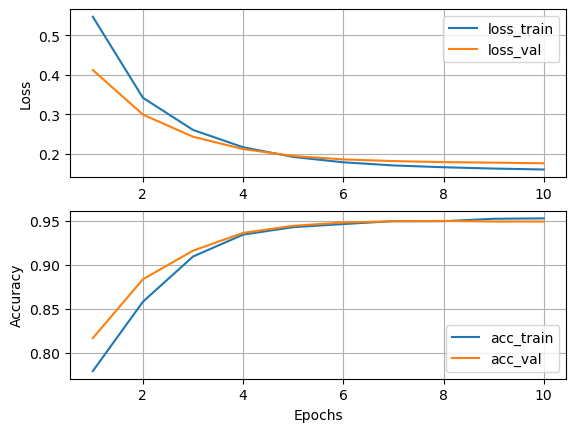

In [47]:
plot_loss_accuracy_curve(history_1)

In [48]:
y_pred = model_ann.predict(X_test)
y_pred = (y_pred > 0.5)

141/141 [==============================] - 0s 1ms/step


In [49]:
printModelTrainingReport(y_pred, y_test)

Accuracy 0.9488888888888889 

Confusion matrix 

 [[3325  103]
 [ 127  945]] 

classification Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.97      3428
           1       0.90      0.88      0.89      1072

    accuracy                           0.95      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.95      0.95      0.95      4500



### Making more deeper model

In [56]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model_ann_2 = tf.keras.Sequential()

#Hidden layer 1
model_ann_2.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(18,), kernel_regularizer=l2(0.01)))
model_ann_2.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden layer 2
model_ann_2.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(18,), kernel_regularizer=l2(0.01)))
model_ann_2.add(Dropout(0.3, noise_shape=None, seed=None))

model_ann_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_ann_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1900      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 12,101
Trainable params: 12,101
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_ann_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [58]:
BATCH_SIZE = 32
EPOCHS = 25

history_2 = model_ann_2.fit(X_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      verbose=1,
                      validation_data=(X_test, y_test))

Epoch 1/25
329/329 [==============================] - 2s 3ms/step - loss: 0.8583 - accuracy: 0.8455 - val_loss: 0.3990 - val_accuracy: 0.9342
Epoch 2/25
329/329 [==============================] - 1s 3ms/step - loss: 0.3307 - accuracy: 0.9286 - val_loss: 0.2852 - val_accuracy: 0.9413
Epoch 3/25
329/329 [==============================] - 1s 3ms/step - loss: 0.2673 - accuracy: 0.9407 - val_loss: 0.2509 - val_accuracy: 0.9496
Epoch 4/25
329/329 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.9467 - val_loss: 0.2412 - val_accuracy: 0.9482
Epoch 5/25
329/329 [==============================] - 1s 3ms/step - loss: 0.2348 - accuracy: 0.9494 - val_loss: 0.2307 - val_accuracy: 0.9493
Epoch 6/25
329/329 [==============================] - 1s 3ms/step - loss: 0.2295 - accuracy: 0.9484 - val_loss: 0.2303 - val_accuracy: 0.9516
Epoch 7/25
329/329 [==============================] - 1s 3ms/step - loss: 0.2230 - accuracy: 0.9481 - val_loss: 0.2239 - val_accuracy: 0.9500
Epoch 

In [59]:
annScore(X_test, y_test, model_ann_2)

141/141 [==============================] - 0s 1ms/step - loss: 0.2050 - accuracy: 0.9547
Test Loss: 0.20498210191726685
Test accuracy: 95.46666741371155


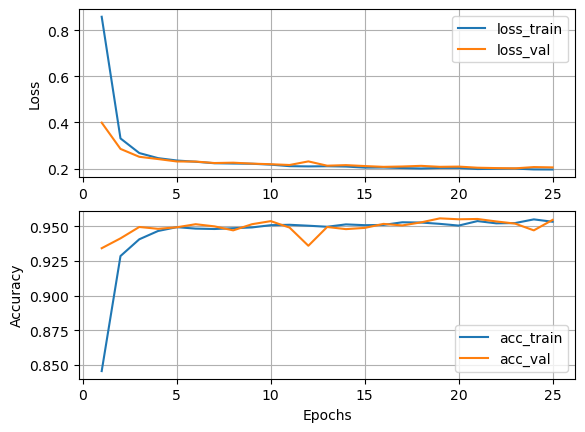

In [60]:
plot_loss_accuracy_curve(history_2)

In [61]:
y_pred2 = model_ann_2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)

141/141 [==============================] - 0s 1ms/step


In [62]:
printModelTrainingReport(y_pred2, y_test)

Accuracy 0.9546666666666667 

Confusion matrix 

 [[3369   59]
 [ 145  927]] 

classification Report:               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3428
           1       0.94      0.86      0.90      1072

    accuracy                           0.95      4500
   macro avg       0.95      0.92      0.94      4500
weighted avg       0.95      0.95      0.95      4500

